"""
Ce TP a été réalisé avec la version 3 de Python
"""

In [2]:
# Import des librairies nécessaires

%matplotlib inline

import urllib.request
from os import path
import pandas as pd
from math import *
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import scipy.stats.kde as kde
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pe

In [3]:
##############################################
# Question 1
##############################################

url_csv = "http://www.math.uah.edu/stat/data/"
filename = "Galton.csv"

Location = url_csv + filename

# Vérification que le fichier existe dans le répertoire courant, sinon import de ce dernie
if not (path.isfile(filename)):
    urllib.request.urlretrieve(Location, filename)

fields = ['Family', 'Father', 'Mother', 'Gender', 'Height', 'Kids']

# Contrucution de la dataframe
df = pd.read_csv(filename, sep=',', usecols=fields)

# Conversion en centimètres des tailles
df["Father"] = df["Father"].apply(lambda taille: round(2.54 * taille))
df["Mother"] = df["Mother"].apply(lambda taille: round(2.54 * taille))
df["Height"] = df["Height"].apply(lambda taille: round(2.54 * taille))

print(df)

    Family  Father  Mother Gender  Height  Kids
0        1     199     170      M     186     4
1        1     199     170      F     176     4
2        1     199     170      F     175     4
3        1     199     170      F     175     4
4        2     192     169      M     187     4
5        2     192     169      M     184     4
6        2     192     169      F     166     4
7        2     192     169      F     166     4
8        3     190     163      M     180     2
9        3     190     163      F     173     2
10       4     190     163      M     179     5
11       4     190     163      M     174     5
12       4     190     163      F     170     5
13       4     190     163      F     164     5
14       4     190     163      F     160     5
15       5     190     149      M     183     6
16       5     190     149      M     175     6
17       5     190     149      M     173     6
18       5     190     149      F     169     6
19       5     190     149      F     15

In [4]:
##############################################
# Question 2
##############################################

# Vérification si des données sont vides dans le dataframe

print("There are " + str(df.isnull().sum().sum()) +
      ' total missing values')

There are 0 total missing values


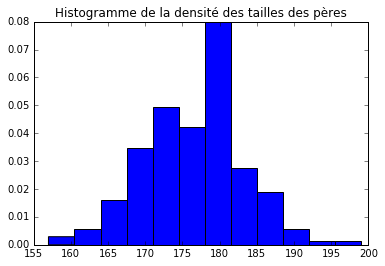

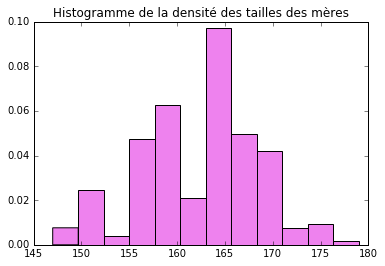

In [5]:
##############################################
# Question 3
##############################################

# Création d'une nouvelle dataframe pour n'avoir que les pères et les mères afin du supprimer les doublons liés aux enfants
df_peres_meres = df.copy()
df_peres_meres = df_peres_meres.drop_duplicates(["Family", "Father", "Mother"])
df_peres_meres = df_peres_meres.drop(["Gender", "Height", "Kids"], axis=1)

# Affichage de la densité des tailles des pères
# pour afficher à l'intérieur du notebook : %matplotlib inline
plt.hist(df_peres_meres["Father"], bins=12, normed=True, color="blue")
plt.title("Histogramme de la densité des tailles des pères")
plt.show()

# Affichage de la densité des tailles des mères
plt.hist(df_peres_meres["Mother"], bins=12, normed=True, color="violet")
plt.title("Histogramme de la densité des tailles des mères")
plt.show()

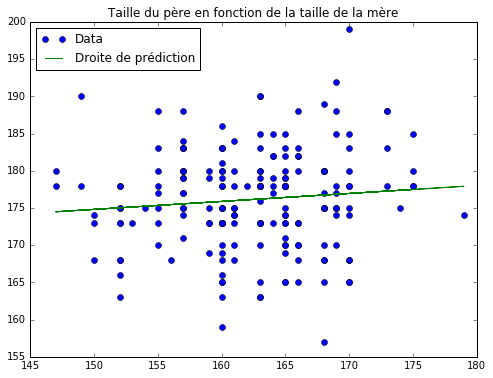

In [6]:
##############################################
# Question 4
##############################################

y = df_peres_meres['Father']
X = df_peres_meres[['Mother']]
skl_linmod = lm.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)  # Fit regression model
fig = plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label="Data")
plt.plot(X, skl_linmod.predict(X), label="Droite de prédiction")
plt.legend(loc='upper left')
plt.title("Taille du père en fonction de la taille de la mère")
plt.show()

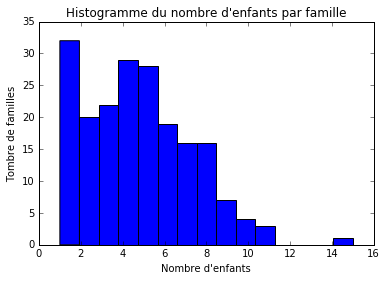

In [7]:
##############################################
# Question 5
##############################################

# Création d'une dataframe avec une ligne par famille
df_familles = df.copy()
df_familles = df.drop_duplicates(["Family"])

# Affichage de l'histogramme du nombre des enfants
plt.hist(df_familles["Kids"], bins=15)
plt.title("Histogramme du nombre d'enfants par famille")
plt.xlabel("Nombre d'enfants")
plt.ylabel("Tombre de familles")
plt.show()

In [8]:
##############################################
# Question 6
##############################################

# Création de la dataFrame avec la nouvelle colonne "MeanParents"
df_avec_taille_moyenne = df.copy()
df_avec_taille_moyenne['MeanParents'] = pd.Series(
        (df_avec_taille_moyenne['Father'] + 1.08 * df_avec_taille_moyenne['Mother']) / 2
        , index=df_avec_taille_moyenne.index)
print(df_avec_taille_moyenne)

    Family  Father  Mother Gender  Height  Kids  MeanParents
0        1     199     170      M     186     4       191.30
1        1     199     170      F     176     4       191.30
2        1     199     170      F     175     4       191.30
3        1     199     170      F     175     4       191.30
4        2     192     169      M     187     4       187.26
5        2     192     169      M     184     4       187.26
6        2     192     169      F     166     4       187.26
7        2     192     169      F     166     4       187.26
8        3     190     163      M     180     2       183.02
9        3     190     163      F     173     2       183.02
10       4     190     163      M     179     5       183.02
11       4     190     163      M     174     5       183.02
12       4     190     163      F     170     5       183.02
13       4     190     163      F     164     5       183.02
14       4     190     163      F     160     5       183.02
15       5     190     1

In [17]:
##############################################
# Question 7
##############################################

# Calcul des valeurs des paramètres du modèle linéaire via LinearRegression
y = df_avec_taille_moyenne['Height']
X = df_avec_taille_moyenne[['MeanParents']]

skl_linmod = lm.LinearRegression(fit_intercept=True)
skl_linmod.fit(X, y)  # Fit regression model

theta0 = skl_linmod.intercept_
theta1 = skl_linmod.coef_[0]

print("Theta 0 = " + str(theta0))
print("Theta 1 = " + str(theta1))

# Calcul manuel des paramètres du modèle linéaire
theta0_manuel = np.mean(y) - theta1 * np.mean(X)

theta1_manuel_numerateur = np.dot((X - np.mean(X)).transpose(), (y - np.mean(y)))
theta1_manuel_denominateur = np.dot((X - np.mean(X)).transpose(), (X - np.mean(X)))
theta1_manuel = theta1_manuel_numerateur / theta1_manuel_denominateur

# Vérification de la cohérence des paramètres calculés via les deux méthodes
print("Les deux valeurs pour teta zero sont-elles identiques ? :" + str(np.isclose(theta0, theta0_manuel)))
print("Les deux valeurs pour teta un sont-elles identiques ? :" + str(np.isclose(theta1, theta1_manuel)))

Theta 0 = 58.255916588
Theta 1 = 0.633093766663
Les deux valeurs pour teta zero sont-elles identiques ? :[ True]
Les deux valeurs pour teta un sont-elles identiques ? :[[ True]]


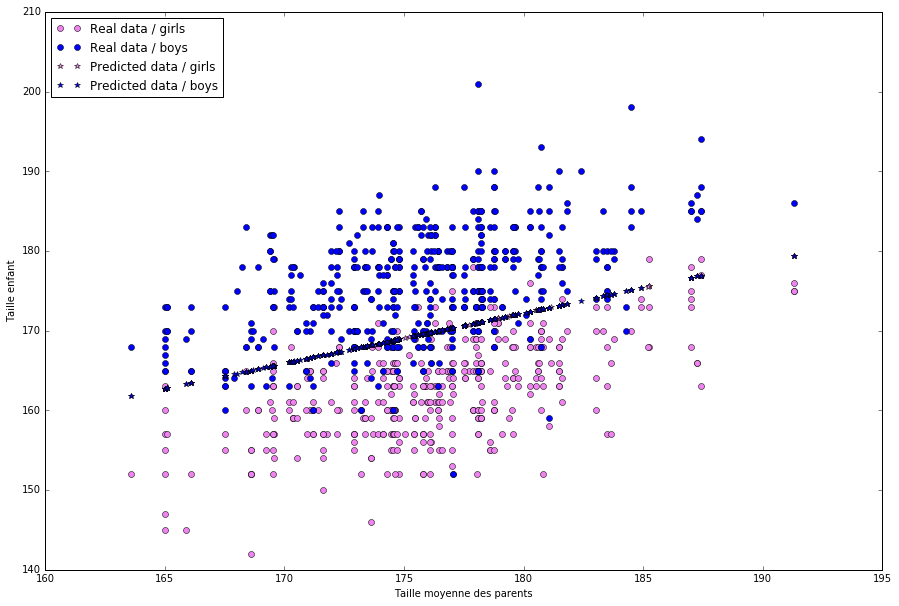

In [18]:
#############################################
# Question 8
#############################################

# Création d'une dataframe avec uniquement les filles, et récupération des tailles, et tailles moyennes de leurs parents
df_filles = df_avec_taille_moyenne.copy()
df_filles = df_filles[df_filles["Gender"] == "F"]
y_filles = df_filles['Height']
X_filles = df_filles[['MeanParents']]

# Création d'une dataframe avec uniquement les garçons, et récupération des tailles, et tailles moyennes de leurs parents
df_garcons = df_avec_taille_moyenne.copy()
df_garcons = df_garcons[df_garcons["Gender"] == "M"]
y_garcons = df_garcons['Height']
X_garcons = df_garcons[['MeanParents']]

# Création de la figure : avec les données réelles et les données prédites
fig = plt.figure(figsize=(15, 10))
plt.plot(X_filles, y_filles, 'o', label="Real data / girls", color="violet")
plt.plot(X_garcons, y_garcons, 'o', label="Real data / boys", color="blue")
plt.plot(X_filles, skl_linmod.predict(X_filles), '*', label="Predicted data / girls", color="violet")
plt.plot(X_garcons, skl_linmod.predict(X_garcons), '*', label="Predicted data / boys", color="blue")
# plt.legend(["Liste des points","Régression Linéaire"],loc='upper left')
plt.xlabel('Taille moyenne des parents')
plt.ylabel('Taille enfant')
plt.legend(loc='upper left')

plt.show()

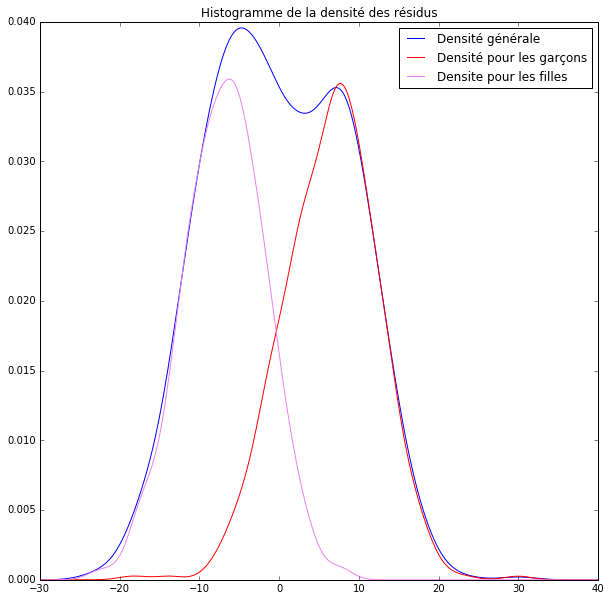

In [19]:
#############################################
# Question 9
#############################################

# Calcul du résidu et calcul du KDE
residu = y - skl_linmod.predict(X)
kde_residu = kde.gaussian_kde(residu)

# Ajout dans le dataframe de la colonne "Residu" pour pouvoir faire des filtres sur les genres
df_avec_residu = df_avec_taille_moyenne.copy()
df_avec_residu["Residu"] = pd.Series(residu, index=df_avec_residu.index)

# Calcul des KDE pour les filles et les garçons
kde_residu_filles = kde.gaussian_kde(df_avec_residu[df_avec_residu["Gender"] == "F"]["Residu"])
kde_residu_garcons = kde.gaussian_kde(df_avec_residu[df_avec_residu["Gender"] == "M"]["Residu"])


# Affichage du résultat
kde_range = np.linspace(-30, 40, 1000)
ratio_filles = len(df_filles) / len(df)
ratio_garcons = len(df_garcons) / len(df)

fig = plt.figure(figsize=(10, 10))
plt.title("Histogramme de la densité des résidus")
plt.plot(kde_range, kde_residu(kde_range), color='blue', label="Densité générale")
plt.plot(kde_range, ratio_garcons * kde_residu_garcons(kde_range), color='red', label="Densité pour les garçons")
plt.plot(kde_range, ratio_filles * kde_residu_filles(kde_range), color="violet", label="Densite pour les filles")
plt.legend(loc='upper right')

plt.show()

On constate donc que la densité des résidus lorsque l'on ne distingue pas la taille des hommes de la taille des femmes n'est pas une gaussienne

In [22]:
#############################################
# Question 10
#############################################

# Calcul de la régression linéaires en inversant les x et les y
y_reverse = df_avec_taille_moyenne['MeanParents']
X_reverse = df_avec_taille_moyenne[['Height']]

skl_linmod_reverse = lm.LinearRegression(fit_intercept=True)
skl_linmod_reverse.fit(X_reverse, y_reverse)

alpha0 = skl_linmod_reverse.intercept_
alpha1 = skl_linmod_reverse.coef_[0]

print("Alpha 0 = " + str(alpha0))
print("Alpha 1 = " + str(alpha1))

print("Teta 0 et Alpha 0 sont-ils identiques ? " + str(np.isclose(theta0, alpha0)))
print("Teta 1 et Alpha 1 sont-ils identiques ? " + str(np.isclose(theta1, alpha1)))

# Vérification manuelle de la valeurs des alpha

alpha0_manuel = np.mean(X) + np.mean(y) * np.var(X) * (theta0 - np.mean(y)) / (np.mean(X) * np.var(y))
alpha1_manuel = theta1 * np.var(X) / np.var(y)

print("Les deux valeurs pour alpha 0 sont-elles identiques ? " + str(np.isclose(alpha0, alpha0_manuel)))
print("Les deux valeurs pour alpha 1 sont-elles identiques ? " + str(np.isclose(alpha1, alpha1_manuel)))

Alpha 0 = 148.437160448
Alpha 1 = 0.161490302931
Teta 0 et Alpha 0 sont-ils identiques ? False
Teta 1 et Alpha 1 sont-ils identiques ? False
Les deux valeurs pour alpha 0 sont-elles identiques ? [ True]
Les deux valeurs pour alpha 1 sont-elles identiques ? [ True]


In [25]:
#############################################
# Question 11
#############################################

# Définition de la régression linéaire
y_multi_variables = df_avec_taille_moyenne['Height']
X_multi_variables = df_avec_taille_moyenne[["Father", "Mother"]]

skl_linmod_multi_variables = lm.LinearRegression(fit_intercept=True)
skl_linmod_multi_variables.fit(X_multi_variables, y_multi_variables)

# Stockage des résultats : théta et prédictions
Theta_multi_variables = [skl_linmod_multi_variables.intercept_, skl_linmod_multi_variables.coef_[0],
                         skl_linmod_multi_variables.coef_[1]]
print("Theta : ")
print(Theta_multi_variables)

y_prediction_multi_variables = skl_linmod_multi_variables.predict(X_multi_variables)
print("\n y prédiction : ")
print(y_prediction_multi_variables)

Theta : 
[57.694626126911601, 0.38230790501762335, 0.2742656747914276]

 y prédiction : 
[ 180.39906394  180.39906394  180.39906394  180.39906394  177.44864293
  177.44864293  177.44864293  177.44864293  175.03843307  175.03843307
  175.03843307  175.03843307  175.03843307  175.03843307  175.03843307
  171.19871362  171.19871362  171.19871362  171.19871362  171.19871362
  171.19871362  177.01647401  177.01647401  177.01647401  177.01647401
  177.01647401  177.01647401  177.01647401  175.91941131  175.91941131
  175.91941131  176.02745354  175.09661429  172.62822321  172.62822321
  172.62822321  172.62822321  172.62822321  172.62822321  172.62822321
  172.62822321  172.07969186  175.04675327  175.04675327  174.77248759
  174.77248759  174.77248759  173.6754249   173.6754249   173.6754249
  173.6754249   173.6754249   173.6754249   173.6754249   173.6754249
  173.6754249   173.40115922  173.40115922  173.40115922  173.40115922
  173.40115922  173.40115922  173.12689355  173.12689355  173

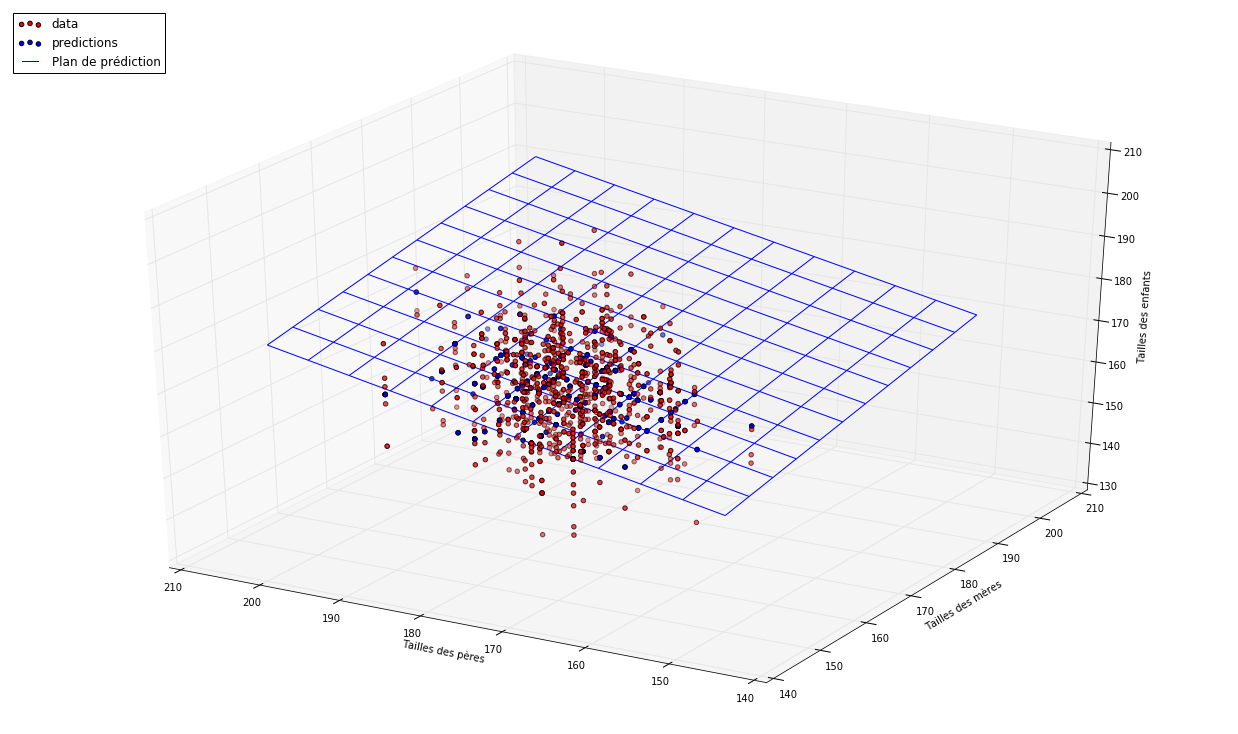

In [90]:
fig = plt.figure(figsize=(17, 10))
plt.title("Affichage des tailles des enfants en 3D")

XX = np.arange(150, 210, 5)
YY = np.arange(150, 210, 5)
xx, yy = np.meshgrid(XX, YY)

zz = Theta_multi_variables[0] + Theta_multi_variables[1]*xx + Theta_multi_variables[2]*yy


ax = Axes3D(fig)

ax.scatter(df_avec_taille_moyenne["Father"], df_avec_taille_moyenne["Mother"], y_multi_variables, c='r', marker='o', label = "data")
ax.scatter(df_avec_taille_moyenne["Father"], df_avec_taille_moyenne["Mother"], y_prediction_multi_variables, c='blue', marker='o', label = "predictions")
ax.plot_wireframe(xx, yy, zz, label = "Plan de prédiction")
ax.set_xlabel('Tailles des pères')
ax.set_ylabel('Tailles des mères')
ax.set_zlabel('Tailles des enfants')

# La ligne ci-dessous est nécessaire pour inverser l'affichage des abscisses (sinon les valeurs de l'abscisse ne sont pas affichées dans le bon sens
ax.invert_xaxis()
plt.legend(loc='upper left')
plt.show()

In [27]:
#############################################
# Question 13
#############################################

residu_multi_variables = y - y_prediction_multi_variables
norme_residu = np.linalg.norm(residu_multi_variables)
norme_carree_residu = norme_residu * norme_residu
print(norme_carree_residu)

66544.7955878


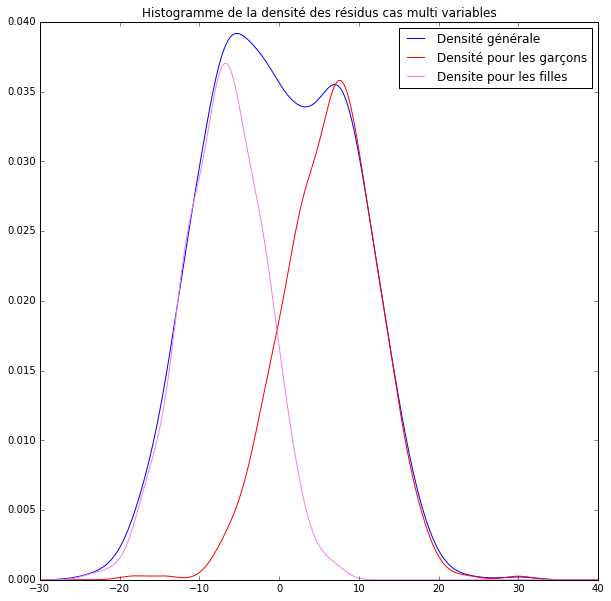

In [31]:
#############################################
# Question 14
#############################################

kde_residu_multi_variables = kde.gaussian_kde(residu_multi_variables)

# Ajout dans le dataframe de la colonne "ResiduMultiVariables" pour pouvoir faire des filtres sur les genres
df_avec_residu_multi_variables = df_avec_residu.copy()
df_avec_residu_multi_variables["ResiduMultiVariables"] = pd.Series(residu_multi_variables,
                                                                   index=df_avec_residu_multi_variables.index)

# Calcul des KDE pour les filles et les garçons
kde_residu_filles_multi_variables = kde.gaussian_kde(
        df_avec_residu_multi_variables[df_avec_residu_multi_variables["Gender"] == "F"]["ResiduMultiVariables"])
kde_residu_garcons_multi_variables = kde.gaussian_kde(
        df_avec_residu_multi_variables[df_avec_residu_multi_variables["Gender"] == "M"]["ResiduMultiVariables"])

# kde_range = np.linspace(-30, 40, 1000)
# ratio_filles = len(df_filles) / len(df)
# ratio_garcons = len(df_garcons) / len(df)

fig = plt.figure(figsize=(10, 10))
plt.title("Histogramme de la densité des résidus cas multi variables")
plt.plot(kde_range, kde_residu_multi_variables(kde_range), color='blue', label="Densité générale")
plt.plot(kde_range, ratio_garcons * kde_residu_garcons_multi_variables(kde_range), color='red',
         label="Densité pour les garçons")
plt.plot(kde_range, ratio_filles * kde_residu_filles_multi_variables(kde_range), color="violet",
         label="Densite pour les filles")
plt.legend(loc='upper right')
plt.show()


On constate donc que la densité des résidus lorsque l'on ne distingue pas la taille des hommes de la taille des femmes n'est pas une gaussienne

#############################################

Question 15
##############################################

D'après les valeurs trouvées pour théta à la question 11, on peut s'appercevoir que la taille du père a un peu plus d'influence que la taille de la mère

- Theta pour le père : 0.38230790501762335
- Theta pour la mère : 0.2742656747914276


In [38]:
df_multi_variables_normalise = df_avec_residu_multi_variables.copy()

fields = ["Height","Father","Mother"]

for field in fields :
    df_multi_variables_normalise[field] = (df_multi_variables_normalise[field]-np.mean(df_avec_residu_multi_variables[field]))/np.sqrt(np.var(df_multi_variables_normalise[field]))

y_multi_variable_normalise = df_multi_variables_normalise['Height']
X_multi_variables_normalise = df_multi_variables_normalise[["Father","Mother"]]

skl_linmod_multi_variables_normalise = lm.LinearRegression(fit_intercept=True)
skl_linmod_multi_variables_normalise.fit(X_multi_variables_normalise, y_multi_variable_normalise)

# Stockage des résultats : théta et prédictions
theta_multi_variables_normalise = [skl_linmod_multi_variables_normalise.intercept_, skl_linmod_multi_variables_normalise.coef_[0],
                         skl_linmod_multi_variables_normalise.coef_[1]]
print(theta_multi_variables_normalise)

[5.3479253646524424e-16, 0.26065404150147342, 0.17776266186672252]


Les valeurs de théta on changé (elles ont diminué) mais la taille du père a comme précédemment toujours plus d'influence que la taille de la 

_______________________________________________________________________________

* * * * * * * * * * * * *  EXERCICE 2  * * * * * * * * * * * * * * * * * * * * 
_______________________________________________________________________________

In [9]:
##############################################
# Exo 2 - Question 1
##############################################

url_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/"
filename = "auto-mpg.data-original"

Location = url_file + filename

# Vérification que le fichier existe dans le répertoire courant, sinon import de ce dernier
if not (path.isfile(filename + ".csv")):
    urllib.request.urlretrieve(Location, filename + ".csv")

fields = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin',
          'car name']
na_values = ['NA']

# Contruction de la dataframe
df = pd.read_csv(filename + ".csv", sep=r"\s+", names=fields, header=None, na_values=na_values)

# Détection des valeurs manquantes
null_data = df[df.isnull().any(axis=1)]

print("Il ya " + str(df.isnull().sum().sum()) +
      ' valeurs non renseignées\n')

# Contruction de la dataframe sans valeurs non définies
df_sans_lignes_vides = df.copy().dropna(axis=0, how="any")

float_fields = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

for field in float_fields:
    df[field] = df[field].apply(lambda i : float(i))

print(df_sans_lignes_vides)

Il ya 14 valeurs non renseignées

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
5    15.0        8.0         429.0       198.0  4341.0          10.0   
6    14.0        8.0         454.0       220.0  4354.0           9.0   
7    14.0        8.0         440.0       215.0  4312.0           8.5   
8    14.0        8.0         455.0       225.0  4425.0          10.0   
9    15.0        8.0         390.0       190.0  3850.0           8.5   
15   15.0        8.0         383.0       170.0  3563.0          10.0   
16   14.0        8.0         340.0       160.0  3609.0           8.0   
18   15.0        8.0         4

Le marqueur qui était utilisé était "NA"

In [10]:
##############################################
# Exo 2 - Question 2
##############################################

df_neuf_lignes = df_sans_lignes_vides.copy().iloc[:9]

# Définition de la régression linéaire
y_neuf_lignes = df_neuf_lignes['mpg']
X_neuf_lignes = df_neuf_lignes[["cylinders", "displacement","horsepower","weight","acceleration","model year"]]

skl_linmod_neuf_lignes = lm.LinearRegression(fit_intercept=True)
skl_linmod_neuf_lignes.fit(X_neuf_lignes, y_neuf_lignes)

# Stockage des résultats : théta et prédictions
theta_neuf_lignes = [skl_linmod_neuf_lignes.intercept_]

for coef in skl_linmod_neuf_lignes.coef_ :
    theta_neuf_lignes.append(coef)
print("Theta : ")
print(theta_neuf_lignes)

# Calcul des prédictions
y_prediction_neufs_lignes = skl_linmod_neuf_lignes.predict(X_neuf_lignes)
print("\nValeurs prédites :")
print(y_prediction_neufs_lignes)

Theta : 
[30.771695365621888, 0.0, 0.0540884756682775, -0.094530596161999991, -0.0042407367063116638, -0.19936701268572868, 0.0]

Valeurs prédites :
[ 17.83593432  16.15135218  17.02803274  16.08414928  17.15247702
  14.85588522  14.27266143  14.2658702   13.35363761]


Les thétas correspondants à la cylindrée et à l'année du modèle sont nuls. Ils n'ont donc aucune influence sur la détermination de la prédiction

In [11]:
##############################################
# Exo 2 - Question 3
##############################################

df_normalise = df_sans_lignes_vides.copy()

# Normalisation de toutes les colonnes de la matrice
# Le dictionnaire ci-dessous est nécessaire pour la question 5
infos_normalisation = {}

for field in float_fields:
    infos_normalisation[field] = (np.mean(df_sans_lignes_vides[field]), np.var(df_sans_lignes_vides[field]))
    df_normalise[field] = (df_sans_lignes_vides[field] - np.mean(df_sans_lignes_vides[field])) / np.sqrt(
        np.var(df_sans_lignes_vides[field]))

y_normalise = df_normalise['mpg']
X_normalise = df_normalise[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]]

skl_linmod_normalise = lm.LinearRegression(fit_intercept=True)
skl_linmod_normalise.fit(X_normalise, y_normalise)

# Calcul de Théta
theta_normalise = [skl_linmod_normalise.intercept_]

for coef in skl_linmod_normalise.coef_:
    theta_normalise.append(coef)
print(theta_normalise)

# Calcul des prédictions
y_prediction_normalise = skl_linmod_normalise.predict(X_normalise)
print(y_prediction_normalise)

[-5.8578570779228981e-17, -0.072090655791224131, 0.10294694602680471, -0.0019300083960400098, -0.73944398644893838, 0.030141841853979685, 0.35556739894897638]
[-1.07286084 -1.20247449 -1.01469615 -1.01493232 -1.046756   -1.70755697
 -1.70630647 -1.68870605 -1.7565208  -1.33399667 -1.07331272 -1.1771425
 -1.23362102 -0.58937007 -0.07339967 -0.47066916 -0.41835668 -0.24829932
  0.11666278  0.44154718 -0.31010215 -0.13508478 -0.05753146  0.02651728
 -0.31364597 -1.97145498 -1.8036432  -1.8149489  -2.07826935  0.21330971
  0.14970318  0.13782666 -0.19467041 -0.87615327 -0.75539381 -0.73125656
 -0.73738653 -1.55013365 -1.72912634 -1.4841958  -1.47146501 -2.17410737
 -1.9692133  -2.31289778 -0.44999571  0.06337602 -0.71989557 -0.60011564
  0.15411714  0.23255695  0.29999265  0.26170462  0.54926286  0.67857302
  0.52195375  0.4264799   0.20729978  0.34168597  0.30203271  0.16458894
  0.27288265 -1.51014453 -1.55814869 -1.40334306 -1.37122712 -1.03543456
 -1.75835005 -1.69197149 -1.65212622 -1

Les données qui expliquent le plus la consommation sont le poids de la voiture et l'année du modèle

In [12]:
##############################################
# Exo 2 - Question 4
##############################################

# Calcul de la norme du résidu au carré
residu_normalise = y_normalise - y_prediction_normalise
norme_residu = np.linalg.norm(residu_normalise)
norme_carree_residu = norme_residu * norme_residu
print("La norme du résidu au carré est de : " + str(norme_carree_residu))

# Calcul de la norme au carre divisé par (n - p)
norme_residu_rabattu = norme_residu / (len(X_normalise) - X_normalise.shape[1])
print("la norme au carre divisé par (n - p) est de : " + str(norme_residu_rabattu))

norme_a_gauche = (np.linalg.norm(y_normalise - np.mean(y_normalise)*np.ones(len(y_normalise))))**2
norme_a_droite = norme_carree_residu + (np.linalg.norm(y_prediction_normalise - np.mean(y_normalise)*np.ones(len(y_normalise))))**2

print("Les deux normes au carré sont-elles identiques ? " + str(np.isclose(norme_a_gauche, norme_a_droite)))

La norme du résidu au carré est de : 74.7719266969
la norme au carre divisé par (n - p) est de : 0.0224017517967
Les deux normes au carré sont-elles identiques ? True


In [13]:
##############################################
# Exo 2 - Question 5
##############################################

nouveau_vehicule = [6, 225, 100, 3233, 15.4, 76]
nouveau_vehicule_norme = []

# La boucle ci-dessous sert à normaliser le vecteur
index = 0

for field in float_fields:
    if field == "mpg":
        continue
    nouveau_vehicule_norme.append(
        (nouveau_vehicule[index] - infos_normalisation[field][0]) / np.sqrt(infos_normalisation[field][1]))
    index += 1

# On calcule le y prédit et on le dénormalise
y_nouveau_vehicule_norme = skl_linmod_normalise.predict(nouveau_vehicule_norme)
y_nouveau_vehicule = y_nouveau_vehicule_norme * np.sqrt(infos_normalisation["mpg"][1]) + infos_normalisation["mpg"][0]

print("La valeur prédite pour la consommation de cette voiture est :" + str(y_nouveau_vehicule_norme))

La valeur prédite pour la consommation de cette voiture est :[-0.21419992]


/Users/lolo/Environnements/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


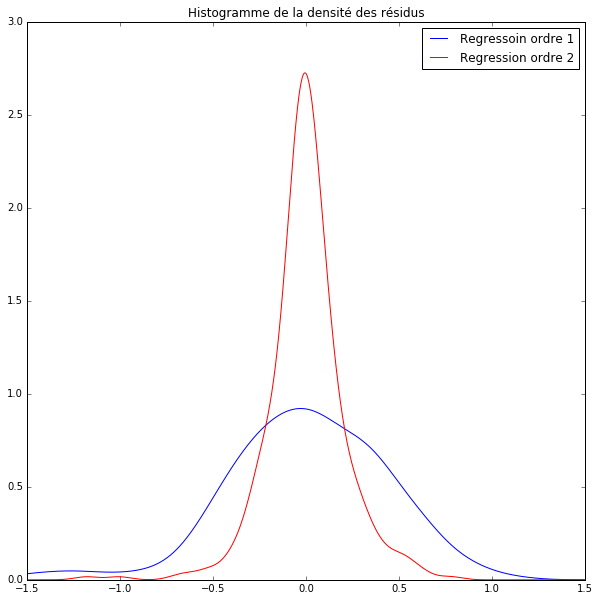

In [14]:
##############################################
# Exo 2 - Question 6
##############################################

# Ajout du modèle d'ordre 2
poly = pe.PolynomialFeatures(degree=2, interaction_only=False)
X_poly = df_sans_lignes_vides[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]]
X_poly_transform = poly.fit_transform(X_poly)

# Normalisation des variables explicatives
X_poly_normalise = pe.StandardScaler().fit_transform(X_poly_transform)

# Mise en place du modèle d'ordre 2
skl_poly = Pipeline([('poly', pe.PolynomialFeatures(degree=2)), ('linear', lm.LinearRegression(fit_intercept=True))])
skl_poly = skl_poly.fit(X_poly_normalise, y_normalise)

# Calcul des prédictions
y_prediction_poly = skl_poly.predict(X_poly_normalise)

# Vérification graphique pour voir si le modèle d'ordre 2 fonctionne mieux que celui d'ordre 1
# Calcul des résidus
residu_normalise = y_prediction_normalise - y_normalise
residu_poly = y_prediction_poly - y_normalise

# Affichage de la densité des résidus
kde_range_residu = np.linspace(-1.5, 1.5, 1000)
kde_residu_normalise = kde.gaussian_kde(residu_normalise)
kde_residu_poly = kde.gaussian_kde(residu_poly)

fig = plt.figure(figsize=(10, 10))
plt.title("Histogramme de la densité des résidus")
plt.plot(kde_range_residu, kde_residu_normalise(kde_range_residu), color='blue', label="Regressoin ordre 1")
plt.plot(kde_range_residu, kde_residu_poly(kde_range_residu), color='red',
         label="Regression ordre 2")
plt.legend(loc='upper right')
plt.show()

Les residus étant beaucoup plus concentrés vers la valeur 0 pour la regression d'ordre 2, on constate donc que cette dernière est bien plus efficace que la regression d'ordre 1

In [15]:
##############################################
# Exo 2 - Question 7
##############################################

# Ajout de la nouvelle variable origin et concaténation avec le dataframe original sans les lignes vides
# la methode get_dummies permet d'ajouter une colonne par valeur de la variable pour gérer la variable origin
s_origin = pd.get_dummies(df_sans_lignes_vides["origin"])
df_origin = pd.concat([df_sans_lignes_vides, s_origin], axis=1)

# Définition de la correspondance entre les identifiants des origines et leurs libellés
origin_valeurs = {1: "usa", 2: "europe", 3: "japan"}

# Affiche des moyennes de la consommation du carburant pour chaque origine
for cle, valeur in origin_valeurs.items():
    print("La valeur moyenne de la consommation pour {0} est de {1}".format(valeur, np.mean(
            df_origin[df_origin[cle] == 1]["mpg"])))

La valeur moyenne de la consommation pour usa est de 20.033469387755098
La valeur moyenne de la consommation pour europe est de 27.602941176470587
La valeur moyenne de la consommation pour japan est de 30.450632911392397


Le mpg est le nombre de miles parcouru par gallon, l'origine la plus efficace est donc celle dont la moyenne est la plus élevée, il s'agit donc du Japon

In [16]:
##############################################
# Exo 2 - Question 8
##############################################

# Création d'une série avec la liste des marques puis nettoyage des données
s_brand = df_sans_lignes_vides["car name"].apply(lambda nom: nom.split(" ")[0])
s_brand = s_brand.replace("vw", "volkswagen")
s_brand = s_brand.replace("vokswagen", "volkswagen")
s_brand = s_brand.replace("mercedes-benz", "mercedes")
s_brand = s_brand.replace("chevroelt", "chevrolet")
s_brand = s_brand.replace("chevy", "chevrolet")
s_brand = s_brand.replace("toyouta", "toyota")
s_brand = s_brand.replace("maxda", "mazda")
s_brand = s_brand.replace("capri", "mercury")

# Détermination de l'ensemble des marques différentes
liste_brand = s_brand.unique()

# Ajout de la marque comme variable au dataframe
s_brand = pd.get_dummies(s_brand)
df_brand = pd.concat([df_origin, s_brand], axis=1)

# Affiche des moyennes de la consommation du carburant pour chaque marque
meilleur_conso = 0
best_brand = ""

# Recherche pour trouver la marque avec la meilleure consommation
for brand in liste_brand:
    conso = np.mean(df_brand[df_brand[brand] == 1]["mpg"])
    if meilleur_conso < conso:
        best_brand = brand
        meilleur_conso = conso

# Affichage du résultat
print(
    "La marque avec la meilleure consommation est {0} avec une consommation de {1}".format(best_brand, meilleur_conso))

La marque avec la meilleure consommation est nissan avec une consommation de 36.0
